In [95]:
#POLYNOMIAL REGRESSION

In [96]:
# Y=B0+B1X+B2X2+B3X3+...+e(error rate)

In [97]:
#in multiple regression x values may be different, bu there x is the same but it is like x square x cube etc.
#or in polynomial regression x1 and x2, x1 cube x2 cube etc.


In [98]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [99]:
data=pd.read_csv("maaslar.csv")
df=data.copy()
df

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


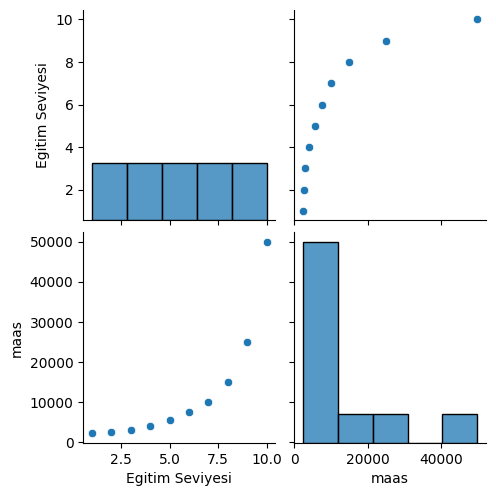

In [100]:
#lets learn the relationships among columns
sbn.pairplot(df)
plt.show()

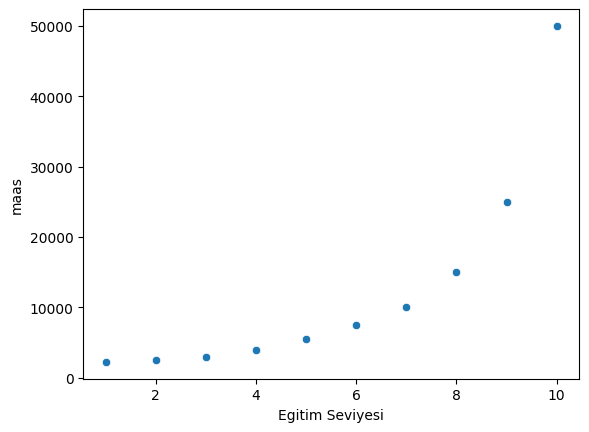

In [101]:
#look deeply into the relationship between maas and egitim seviyesi
sbn.scatterplot(x="Egitim Seviyesi",y="maas",data=df)
plt.show()

In [102]:
#unvan has no need to be involved 
df["unvan"].unique()

array(['Cayci', 'Sekreter', 'Uzman Yardimcisi', 'Uzman',
       'Proje Yoneticisi', 'Sef', 'Mudur', 'Direktor', 'C-level', 'CEO'],
      dtype=object)

In [103]:
#split data as x ,y

x=df[["Egitim Seviyesi"]]
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [104]:
#split data as x ,y
y=df[["maas"]]
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


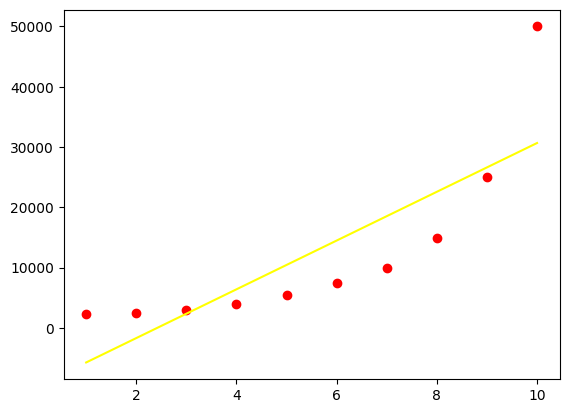

In [105]:
#in this dataset linear relationship is meaningless but lets try

from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(x,y)
y_predicted=linear_reg.predict(x)

plt.scatter(x,y,color="red")
plt.plot(x,y_predicted,color="yellow")
plt.show()

In [106]:
#polynomial regression
#degree 2 as seen in the scatterplot at the beginning

from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [107]:
linear_reg=LinearRegression()
linear_reg.fit(x_poly,y)
y_predicted2=linear_reg.predict(x_poly)

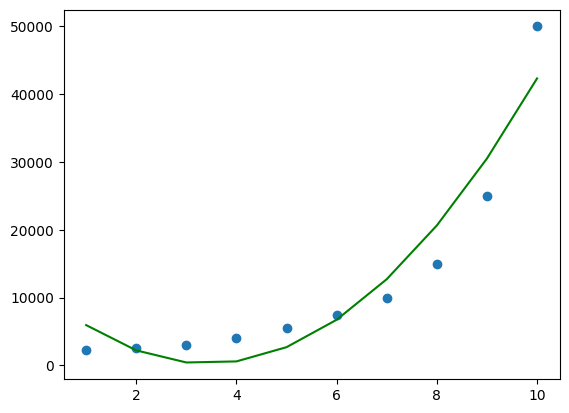

In [108]:
#lets visualize the poly_reg results
plt.scatter(x,y)
plt.plot(x,y_predicted2,color="green")

In [109]:
#change degree as 4 above and run the same code again
x_poly.shape

(10, 3)

In [112]:
#predict some random values in polynomial regression
egitim_seviyesi_poly=poly_reg.fit_transform(np.array([[10]]))

linear_reg.predict(egitim_seviyesi_poly)
#this is more successfull

array([[42331.81818182]])

In [113]:
df

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000
